# level-flight-calculations

In order to calculate the flight velocity of the model, McLean assumes that the energy used to clime to max height is about equal to the energy used during descent, so the average energy can be used to calculate the level flight velocity, Erbach also based hir power calculations on level flight. The difference between these two approaches is that McLean set the lift coefficient for the wing, then used moment calculations to determine the lift coefficient needed for the stab to maintain level flight. Erback approached this a bit differently. He set the incidence for both the wing and stab and calculated the moments using the lift and drag coefficient for the airfoil selected. Erbach's calculations balance the model in forward flight at some angle of attach, which probably should be determined by an iterative scheme. Once he had that setting, the power calculations would be defined by balancing thrust and drag. McLean ignored the effect of drag on the moment calculations, which does not seem like a goodf approach.

I decided to use Erbach's scheme to determine the level flight velocity, then determine the power needed to maintain level flight at the calculated angle of attack. 

IN Erbach's code, the equations needed to determine the moment calculations were coded directly. Since we are doing these calculations numerically anyway, it is easier to set up a coordinate transformation system that calculated moments in a coordinate system centered on the center of gravity, and rotated so the *X** axis aligns with the model bodt at some angle of attack.

The transformation matrix we need looks like this:


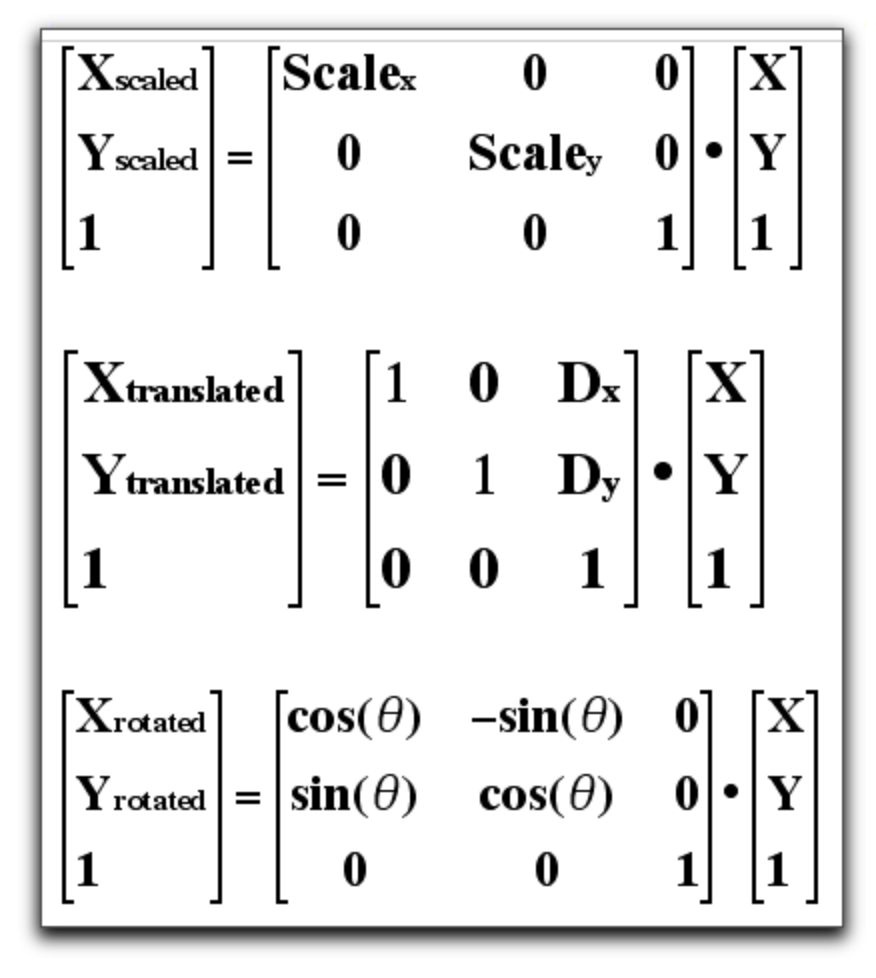

In [2]:
from IPython.display import Image
Image(filename='../../mmtime/data/images/affine.png')

We will skip the scaling transformation. 

The translation will move the model system from the nose to the center of gravity, then we will rotate the system  by a negative $\alpha$ which will be nose up. Let's set this up and test it:

In [38]:
# model coordinates (referenced to lower body nose)
import numpy as np
import math
xcg = 2
ycg = 1

def transform(xcg,ycg, alpha, xp, yp):
    T = np.array([
        [1,0,-xcg],
        [0,1,-ycg],
        [0,0,1]
    ])
    alpha_rad = -alpha*math.pi/180.0
    R = np.array([
        [math.cos(alpha_rad), -math.sin(alpha_rad), 0],
        [math.sin(alpha_rad), math.cos(alpha_rad),0],
        [0,0,1]
    ])
    x = np.array(
        [xp, yp, 1]
    )

    # do the transformation
    res = np.dot(R,np.dot(T,x))
    return res[0], res[1]

print(transform(xcg,ycg,90,0,0))

(-1.0000000000000002, 2.0)
